In [4]:
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

%matplotlib inline

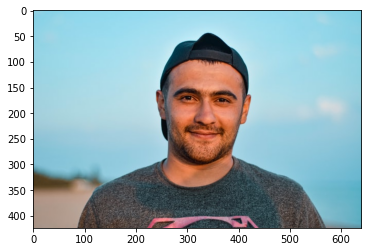

In [5]:
#Import image here

image = cv2.imread("human.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

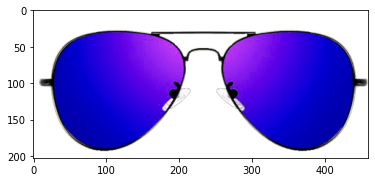

In [9]:
# Add object to show in filter ,ex:sunglasses
glasses = cv2.imread("sunglasses_blue.png",-1)
glasses = cv2.cvtColor(glasses,cv2.COLOR_BGR2RGBA)
plt.imshow(glasses)

In [10]:
mtcnn = MTCNN()
faces = mtcnn.detect_faces(image)
faces

[{'box': [257, 95, 143, 196],
  'confidence': 0.9999998807907104,
  'keypoints': {'left_eye': (300, 171),
   'right_eye': (367, 175),
   'nose': (336, 215),
   'mouth_left': (300, 235),
   'mouth_right': (363, 241)}}]

In [12]:
#Use in case of multiple faces
face = faces[0]
face

{'box': [257, 95, 143, 196],
 'confidence': 0.9999998807907104,
 'keypoints': {'left_eye': (300, 171),
  'right_eye': (367, 175),
  'nose': (336, 215),
  'mouth_left': (300, 235),
  'mouth_right': (363, 241)}}

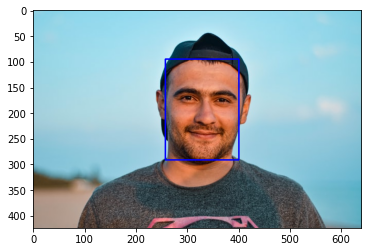

In [16]:
x, y, w, h =face['box']

temp_image = np.copy(image)

temp_image = cv2.rectangle(temp_image,(x,y),(x+w,y+h),(0,0,255),2)

plt.imshow(temp_image)

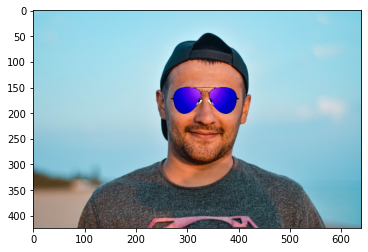

In [28]:
img_filter = np.copy(glasses)
bg_image = np.copy(image)


(x1,y1),(x2,y2) = (face['keypoints']['left_eye']),(face['keypoints']['right_eye'])

x1 -= 35
y1 -= 30
x2 += 35
y2 += 30

w = x2 - x1
h = y2 - y1

img_filter = cv2.resize(img_filter,(w,h))

alpha_filter = img_filter[:,:,3]/255.0
alpha_bg = 1.0 -alpha_filter

for c in range(0,3):
    bg_image[y1:y2,x1:x2,c] = (alpha_filter * img_filter[:,:,c]+ 
                               alpha_bg * bg_image[y1:y2,x1:x2,c])
    
plt.imsave("final_image.jpg",bg_image)
plt.imshow(bg_image)

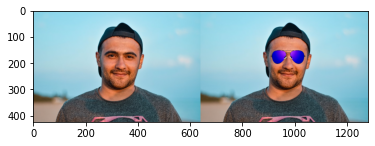

In [29]:
snapchat_filter = np.hstack((image,bg_image))

plt.imsave("snapchat_filter.jpg",snapchat_filter)
plt.imshow(snapchat_filter)

In [30]:
cv2.destroyAllWindows()